**DS 2500 Final Project**

Names: Tiffany T. Nguyen & Angela Wang

**Modeling the Music Industry**

Music allows individuals to express their ideas, appreciate rhythm, and share experiences through
lyrics, stories, and melodies. As the genres range from pop to country to classical to rock, songs can be classified by characteristics including energy levels, danceability, tempo, liveliness, and more! Although music taste is subjective, the number of active listeners and streams contribute to songs and album’s overall ranking in the industry.

Through this data science project, we will test the following:

1) Our hypothesis is that songs with higher average energy and danceability scores tend to have higher rankings than songs with lower “positive” music attributes

2) We also will test whether songs with higher danceability scores will also lead to higher revenues on average due to music stereotypically associated with mood boosting and mental relaxation.

3) Our analysis will not only test this hypothesis, but it will also visualize the correlation and relationship between various characteristics of a song and also compute metrics based on various streaming channels, genres, and more.

4) Our analysis will implement sentiment analysis models to analyze the correlated sentiment scores on top ranked songs across various decades.

In [ ]:
#importing necessary tools & libraries

from google.colab import drive
drive.mount('/content/drive/')

import numpy as np
import statistics
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import requests
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import f1_score, precision_score, recall_score
from textblob import TextBlob
from bs4 import BeautifulSoup

Mounted at /content/drive/


In [ ]:
 SPOTIFY_FILE_SONG_DATA = "/content/drive/MyDrive/Colab Notebooks/Song_dataset.csv"
SPOTIFY_FILE_CHART2000 = "/content/drive/MyDrive/Colab Notebooks/chart2000-song.csv"
SPOTIFY_FILE_YEAR_RANKS = "/content/drive/MyDrive/Colab Notebooks/yearly-song-ranks.csv"

In [ ]:
spotify_data = pd.read_csv(SPOTIFY_FILE_SONG_DATA) #database of 20,0000+ songs with attributes

#ranking data
spotify_charts2000 = pd.read_csv(SPOTIFY_FILE_CHART2000) #data that has top songs of decade
spotify_charts_yearly = pd.read_csv(SPOTIFY_FILE_YEAR_RANKS) #data that has yearly rankings and revenue associated with song

In [ ]:
spotify_data

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,...,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221,6220896,169907,True,True,1040234854,1.150082,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,...,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645,1079128,31003,True,True,310083733,15.183585,Spotify
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,...,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055,282142,7399,True,True,63063467,7.956897,Spotify
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,...,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952,1788577,55229,True,True,434663559,11.546875,Spotify
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,...,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958,6197318,155930,True,True,617259738,9.942693,Youtube
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20589,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,0.582,0.926,-6.344,0.0328,0.448000,0.000000,...,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678,1113,0,True,True,9227144,11.036949,Spotify
20590,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,0.531,0.936,-1.786,0.1370,0.028000,0.000000,...,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741,2019,0,True,True,10898176,10.140845,Spotify
20591,SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,0.443,0.830,-4.679,0.0647,0.024300,0.000000,...,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646,329,0,True,True,6226110,5.389610,Spotify
20592,SICK LEGEND,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,0.417,0.767,-4.004,0.4190,0.356000,0.018400,...,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533,88,0,True,True,6873961,7.101852,Spotify


In [ ]:

#normalizing labels
spotify_charts_yearly = spotify_charts_yearly.rename(columns=lambda x: x.lower().strip())
spotify_data = spotify_data.rename(columns=lambda x: x.lower().strip())

spotify_data = spotify_data.rename(columns={'track': 'song'})


In [ ]:
#merging dataframes by using song name as unique identifier

#MERGED DATAFRAME of all songs & yearly rankings
merged_df = pd.merge(spotify_data,spotify_charts_yearly, left_on=['artist', 'song'], right_on=['artist', 'song'])

In [ ]:
merged_df = merged_df.dropna()

merged_df

,artist,song,album,album_type,danceability,energy,loudness,speechiness,acousticness,instrumentalness,...,most_playedon,year,position,indicativerevenue,us,uk,de,fr,ca,au
0,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.02530,0.000000,...,Youtube,2001,64,7875.773,57,4,2,17,-,17
1,Red Hot Chili Peppers,Otherside,Californication (Deluxe Edition),album,0.458,0.795,-3.265,0.0574,0.00316,0.000202,...,Spotify,2000,58,8768.991,14,33,44,-,-,31
2,Red Hot Chili Peppers,Dani California,Stadium Arcadium,album,0.556,0.913,-2.360,0.0437,0.01930,0.000009,...,Spotify,2006,18,11706.491,6,2,12,57,-,8
3,50 Cent,In Da Club,Get Rich Or Die Tryin',album,0.902,0.720,-2.776,0.3470,0.26000,0.000000,...,Youtube,2003,1,22899.270,1,3,1,16,-,1
4,50 Cent,Just A Lil Bit,The Massacre,album,0.489,0.692,-6.672,0.4100,0.03220,0.006080,...,Youtube,2005,20,13116.977,3,10,11,38,-,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,Pop Smoke,What You Know Bout Love,Shoot For The Stars Aim For The Moon,album,0.709,0.548,-8.493,0.3530,0.65000,0.000002,...,Spotify,2020,65,4352.621,25,4,12,28,16,5
602,Pop Smoke,What You Know Bout Love,Shoot For The Stars Aim For The Moon,album,0.709,0.548,-8.493,0.3530,0.65000,0.000002,...,Spotify,2021,26,7016.679,9,36,49,38,32,18
603,Stephen Sanchez,Until I Found You,Easy On My Eyes,album,0.346,0.500,-6.097,0.0388,0.75700,0.000000,...,Spotify,2022,87,3646.026,38,72,-,-,56,44
604,Stephen Sanchez,Until I Found You,Easy On My Eyes,album,0.346,0.500,-6.097,0.0388,0.75700,0.000000,...,Spotify,2023,39,6194.658,23,14,52,111,15,8


In [ ]:
#pulling our list of attributes we want, divided into: 1) song characteristics 2) engagement assocaited with the song 3) global song rankings

song_char_list = []
for label in merged_df.columns[4:14]:
  song_char_list.append(label)

song_engagement_list= []
for label in merged_df.columns[16:19]:
  song_engagement_list.append(label)

song_ranking_attributes = []
for label in merged_df.columns[24:34]:
  song_ranking_attributes.append(label)

print(song_char_list)
print(song_engagement_list)
print(song_ranking_attributes)

['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_min']
['views', 'likes', 'comments']
['year', 'position', 'indicativerevenue', 'us', 'uk', 'de', 'fr', 'ca', 'au']


In [ ]:
#computing danceability scores

avg_song_attributes = {'danceability':0, 'energy':0, 'loudness':0, 'speechiness':0, 'acousticness':0, 'instrumentalness':0, 'liveness':0, 'valence':0, 'tempo':0, 'duration_min':0}
avg_song_engagement = {'views':0, 'likes':0, 'comments':0}
avg_song_ranking = {'position':0, 'indicativerevenue':0}

list_music_dct_avg = avg_song_attributes,avg_song_engagement,avg_song_ranking

#finding mean of each attribute and putting it in a dictionary!
for dct in list_music_dct_avg:
  for label in dct:
    dct[label] = merged_df[label].mean()

print(avg_song_attributes)
print(avg_song_engagement)
print(avg_song_ranking)

{'danceability': 0.643338283828383, 'energy': 0.6776171617161717, 'loudness': -5.770328382838284, 'speechiness': 0.08167623762376237, 'acousticness': 0.17970376336633664, 'instrumentalness': 0.005398420709570957, 'liveness': 0.16940792079207923, 'valence': 0.5151127062706271, 'tempo': 119.74017821782178, 'duration_min': 3.6940052255225524}
{'views': 536966725.4075907, 'likes': 3542167.0198019804, 'comments': 196480.34323432343}
{'position': 45.35973597359736, 'indicativerevenue': 8063.488318481848}


**Analyzing & Finding the Industry Average of Our Song Database!**

After filtering the songs that are present in both the 20,000 songs dataset and the yearly ranking dataset, we used pandas dataframe to merge the 2 datasets to be able to access song attributes, song social media engagement, and song ranking & revenue.

This will allow us to find the average attributes in songs present across both datasets to serve as the standard of comparison.

## **Average Song Database Statistics:**

# Average Song Attributes

Danceability: 0.643338283828383

Energy: 0.6776171617161717

Loudness: -5.770328382838284

Speechiness: 0.08167623762376237

Acousticness: 0.17970376336633664

Instrumentalness: 0.005398420709570957

Livenes': 0.16940792079207923

Valence: 0.5151127062706271

Tempo: 119.74017821782178

Duration_min: 3.6940052255225524


Views: 536966725.4075907

Likes: 3542167.0198019804

Comments: 196480.34323432343

Position: 45.35973597359736

Indicativerevenue: 8063.488318481848

In [ ]:
merged_avg_dct = avg_song_attributes,avg_song_engagement,avg_song_ranking

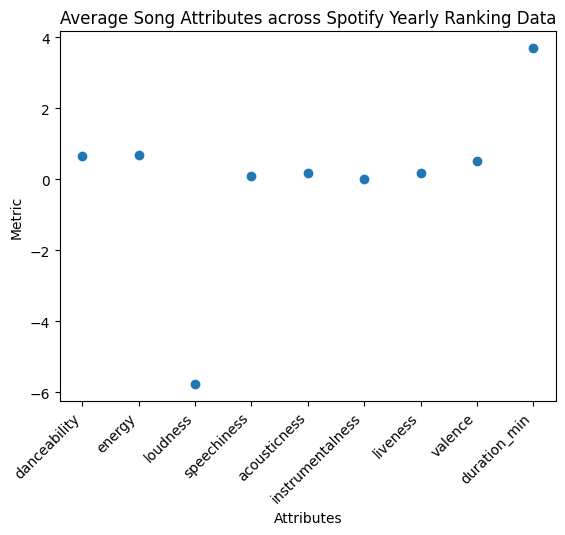

In [ ]:
exclude_key = "tempo"
new_song_char_list = [x for x in song_char_list if x != "tempo"]

values = []
for key,value in avg_song_attributes.items():
  if key != exclude_key:
    values.append(value)
#print(values)

plt.scatter(new_song_char_list,values)
plt.xlabel('Attributes')
plt.ylabel('Metric')
plt.title('Average Song Attributes across Spotify Yearly Ranking Data')
plt.xticks(rotation=45, ha='right')
plt.show()



**Visualizing the average characteristics of Spotify Rankings**

The scatterplot above visualizes the average attributes across the spotify merged dataset.

**Takeaways: Danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence on average ranged from on the 0-2 scale while song duration averaged around 3.7 minutes.**

What can this average characteristics of data be used for?
- This data can be useful for artists comparing their own personal music to the industry "average" for song attributes.
- This data will serve as a useful standard of comparison through our project's hypothesis.

# **Testing Hypothesis 1**

# **Hypothesis 1: Songs that have higher average scores of positive attributes (energy, danceability, etc) will rank higher and therefore generate more revenue compared to songs with lower scores of positive attributes.**

In [ ]:
sorted_merged_df = merged_df.sort_values(by='position')
sorted_merged_df #this will sort the dataset of songs so that top ranked songs are first! This will help us with testing our ranking hypothesis.

sorted_merged_df = sorted_merged_df.dropna()

In [ ]:
#diving dataset into quartile (Q1-Q4) so we can compare attributes of similarly ranked songs
sorted_merged_df['Quartile'] = pd.qcut(sorted_merged_df['position'], q=[0, 0.25, 0.5, 0.75, 1], labels=['Q1', 'Q2', 'Q3', 'Q4'])

sorted_merged_df

,artist,song,album,album_type,danceability,energy,loudness,speechiness,acousticness,instrumentalness,...,year,position,indicativerevenue,us,uk,de,fr,ca,au,Quartile
52,Mariah Carey,We Belong Together,The Emancipation of Mimi,album,0.837,0.462,-7.890,0.0601,0.03390,0.000000,...,2005,1,23175.995,1,2,11,12,-,1,Q1
321,Leona Lewis,Bleeding Love,Spirit,album,0.638,0.656,-5.886,0.0357,0.18800,0.000000,...,2008,1,19300.852,1,2,1,1,1,1,Q1
578,Harry Styles,As It Was,Harry's House,album,0.520,0.731,-5.338,0.0557,0.34200,0.001010,...,2022,1,25220.906,1,1,1,1,1,1,Q1
294,Miley Cyrus,Flowers,Flowers,single,0.707,0.681,-4.325,0.0668,0.06320,0.000005,...,2023,1,27270.017,1,1,1,1,1,1,Q1
35,Sia,Cheap Thrills,This Is Acting (Deluxe Version),album,0.628,0.698,-5.608,0.1050,0.04720,0.001430,...,2016,1,17917.365,1,2,1,1,1,6,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Rae Sremmurd,Swang,SremmLife 2 (Deluxe),album,0.681,0.314,-9.319,0.0581,0.20000,0.000010,...,2017,99,3285.615,26,-,-,-,41,-,Q4
508,Jaymes Young,Infinity,Feel Something,album,0.671,0.673,-6.941,0.0444,0.14800,0.000053,...,2022,99,3463.601,94,47,11,19,52,46,Q4
241,The Killers,Human,Day & Age (Bonus Tracks),album,0.557,0.800,-8.477,0.0601,0.00132,0.001200,...,2008,99,3552.744,32,3,4,-,9,28,Q4
152,D12,How Come,D-12 World,album,0.745,0.858,-2.221,0.2370,0.28000,0.000000,...,2004,100,5382.642,27,4,15,-,-,4,Q4


In [ ]:
#computing mean of each quartile

first_quartile_merged_df = sorted_merged_df[sorted_merged_df['Quartile'] == 'Q1']
first_quart_dct = first_quartile_merged_df[song_char_list].mean().to_dict()

sec_quartile_merged_df = sorted_merged_df[sorted_merged_df['Quartile'] == 'Q2']
sec_quart_dct = sec_quartile_merged_df[song_char_list].mean().to_dict()

third_quartile_merged_df = sorted_merged_df[sorted_merged_df['Quartile'] == 'Q3']
third_quart_dct = third_quartile_merged_df[song_char_list].mean().to_dict()

fourth_quartile_merged_df = sorted_merged_df[sorted_merged_df['Quartile'] == 'Q4']
fourth_quart_dct = fourth_quartile_merged_df[song_char_list].mean().to_dict()

print(first_quart_dct)
print(sec_quart_dct)
print(third_quart_dct)
print(fourth_quart_dct)

{'danceability': 0.67178125, 'energy': 0.6667937500000001, 'loudness': -5.6362375, 'speechiness': 0.07909375, 'acousticness': 0.189332734375, 'instrumentalness': 0.002716339625, 'liveness': 0.16738312500000002, 'valence': 0.5488593749999999, 'tempo': 115.98709375000001, 'duration_min': 3.7075097916666664}
{'danceability': 0.6417762237762238, 'energy': 0.6784055944055944, 'loudness': -5.791748251748252, 'speechiness': 0.0750888111888112, 'acousticness': 0.1889466993006993, 'instrumentalness': 0.014866605594405596, 'liveness': 0.1771853146853147, 'valence': 0.5238111888111888, 'tempo': 119.07776223776226, 'duration_min': 3.7057279720279723}
{'danceability': 0.6290384615384615, 'energy': 0.6827371794871794, 'loudness': -5.783711538461539, 'speechiness': 0.08738589743589745, 'acousticness': 0.1603615512820513, 'instrumentalness': 0.00424352891025641, 'liveness': 0.17164935897435898, 'valence': 0.47897500000000004, 'tempo': 122.66668589743588, 'duration_min': 3.71331688034188}
{'danceabilit

In [ ]:
merged_dct = first_quart_dct,sec_quart_dct,third_quart_dct,fourth_quart_dct

max_dct = {}

dct_counter = 1

#iterating through dict list, to find which quartile dictionary has the highest mean attributes
for dct in merged_dct:
  for key, value in dct.items():
    if key not in max_dct or value > max_dct[key]['value']:
      max_dct[key] = {'value': value, 'dct label': dct_counter}

  dct_counter += 1

## **Interpreting Results: Ranking of Top Songs by Quartile**

After sorting the dataframe by position on the music charts, we decided to section our data into 4 quartiles: top 25%, 25% - 50% percentile, 50% to 75% percentile and bottom 25% percentile.

By adding a column to our existing df to signify which quartile the song ranked, we were able to isolate our data and compute song attribute averages for each of the 4 quartiles to test our first hypothesis.

**As a refresher, our hypothesis was:**

Hypothesis 1: Songs that have higher scores of positive attributes (energy, danceability, etc) will rank higher on the reported music rankings compared to songs with lower scores of positive attributes.

**Conclusion of Hypothesis 1:**

Across all 4 quartile of song rankings of over 600+ spotify songs, the averages of the following attributes (danceability, energy, loudness, acousticness, instrumentalness, liveness, valence, tempo and duration were computed.

The statistics were calculated only within their respective quartile in the dataframe for standard of comparison.

In [ ]:
for key,value in max_dct.items():
  print("Attribute:",key)
  print("Higheset value across all quartiles:"   ,value)
  print()

Attribute: danceability
Higheset value across all quartiles: {'value': 0.67178125, 'dct label': 1}

Attribute: energy
Higheset value across all quartiles: {'value': 0.6831972789115645, 'dct label': 4}

Attribute: loudness
Higheset value across all quartiles: {'value': -5.6362375, 'dct label': 1}

Attribute: speechiness
Higheset value across all quartiles: {'value': 0.08738589743589745, 'dct label': 3}

Attribute: acousticness
Higheset value across all quartiles: {'value': 0.189332734375, 'dct label': 1}

Attribute: instrumentalness
Higheset value across all quartiles: {'value': 0.014866605594405596, 'dct label': 2}

Attribute: liveness
Higheset value across all quartiles: {'value': 0.1771853146853147, 'dct label': 2}

Attribute: valence
Higheset value across all quartiles: {'value': 0.5488593749999999, 'dct label': 1}

Attribute: tempo
Higheset value across all quartiles: {'value': 122.66668589743588, 'dct label': 3}

Attribute: duration_min
Higheset value across all quartiles: {'value

From the above results of using dictionaries to store our quartile data and link the quartile number to the highest "value" of the positive trait, we can see which quartile is the most prevalent.

**Our analysis demonstrated that quartile 1, the top 25% of ranked songs in position on the music chart data had the highest average "positive" attributes in 4 categories: danceability, loudness, acousticness, and valence. **

The 2nd quartile (25th to 50%th percentile) and 3rd quartile (from 50-75% percentile), however came close with the highest average positive attributes in 2 other categories each.



Other Notes:
*Note: duration is a neutral attribute and will not be considered a "positive" trait of a song.*

Conclusion: Our Hypothesis was supported in this analysis where the top rankings of songs demonstrated a higher average of positive attributes across more categories than the lower ranked songs.

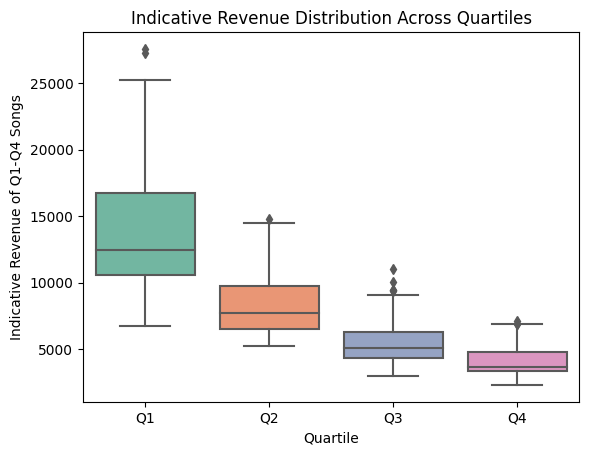

In [ ]:
#PLOTTING revenue distribution across quartiles

sns.boxplot(x='Quartile', y='indicativerevenue', data=sorted_merged_df,palette='Set2')
plt.xlabel('Quartile')
plt.ylabel('Indicative Revenue of Q1-Q4 Songs')
plt.title('Indicative Revenue Distribution Across Quartiles')
plt.show()

In [ ]:
#Linear regression of danceability versus revenue


revenue_total = sorted_merged_df['indicativerevenue'].tolist()
dance_total = sorted_merged_df['danceability'].tolist()

correlation_coefficient, p_value = pearsonr(dance_total, revenue_total)

print("The correlation coefficient of danceability (x) and total indicative revenues across song dataset is",correlation_coefficient)
print("The p-value of danceability (x) and total indicative revenues across song dataset is",p_value)

The correlation coefficient of danceability (x) and total indicative revenues across song dataset is 0.08731611623413664
The p-value of danceability (x) and total indicative revenues across song dataset is 0.03162371643329529


# **Linear Regression between Song Danceability & Revenue**

**Correlation coefficient: 0.0873**

**P-Value: 0.0316**

With a correlation coefficient of 0.0873, this value demonstrates that there is a very strong correlation between danceability and song ranking.

With a p-value of 0.0316, this also demostrates high statistical significance between danceability and revenue.


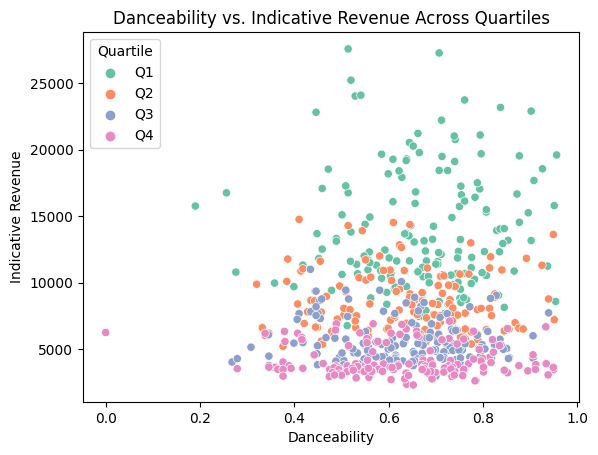

In [ ]:
#Plotting visual scatterplot of revenue across Q1-Q4

sns.scatterplot(x='danceability', y='indicativerevenue', data=sorted_merged_df, palette='Set2',hue='Quartile')
plt.xlabel('Danceability')
plt.ylabel('Indicative Revenue')
plt.title('Danceability vs. Indicative Revenue Across Quartiles')
plt.show()

In [ ]:
#Linear regression of danceability versus indicative revenue


revenue_total = sorted_merged_df['indicativerevenue'].tolist()
song_ranking = sorted_merged_df['position'].tolist()

correlation_coefficient, p_value = pearsonr(song_ranking, revenue_total)

print("The correlation coefficient of song ranking (x) and total indicative revenues across song dataset is",correlation_coefficient)
print("The p-value of song ranking (x) and total indicative revenues across song dataset is",p_value)

The correlation coefficient of song ranking (x) and total indicative revenues across song dataset is -0.7947660821155239
The p-value of song ranking (x) and total indicative revenues across song dataset is 4.1705793068396414e-133


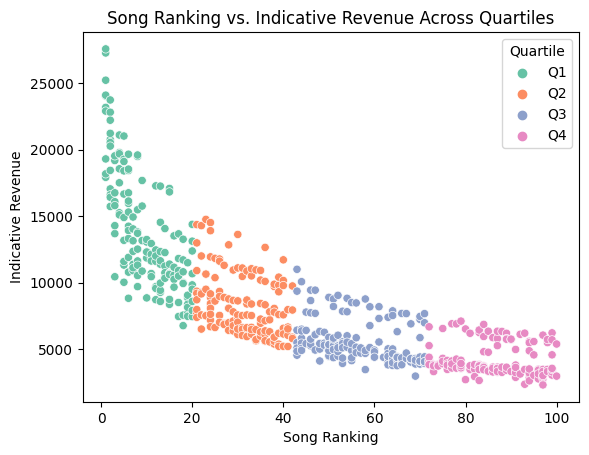

In [ ]:
#Plotting visual scatterplot of song ranking vs. revenue across Q1-Q4

sns.scatterplot(x='position', y='indicativerevenue', data=sorted_merged_df, hue='Quartile', palette='Set2')
plt.xlabel('Song Ranking')
plt.ylabel('Indicative Revenue')
plt.title('Song Ranking vs. Indicative Revenue Across Quartiles')
plt.show()

# **Linear Regression between Song Ranking & Revenue**

**Correlation coefficient: -0.7947**

**P-Value: 4.1705e-133**

With a correlation coefficient of -0.7947, this value demonstrates that there is a very strong NEGATIVE correlation between song ranking and revenue.

With a p-value of 0.0316, this also demostrates VERY high statistical significance between danceability and song ranking.

Explanation: As the ranking numbers are larger meaning lower rankings, the associated revenue decreases. The high p value > 4.0 demonstrates that there seems to be extremely high confidence of this relationship in the spotify data.



# **Industry Connection & Takeaway:**

# **Hypothesis 2: Danceability & Revenue**

2) We will now test whether songs with higher danceability scores will also lead to higher revenues on average due to music being stereotypically associated with mood boosting and mental relaxation.

In [ ]:
dance_merged_df = merged_df.sort_values(by='danceability',ascending=False)
dance_merged_df #this will sort the dataset of songs so that top danceability songs are first! This will help us with testing our ranking hypothesis.

dance_merged_df = dance_merged_df.dropna()
dance_merged_df['Quartile'] = pd.qcut(dance_merged_df['position'], q=[0, 0.25, 0.5, 0.75, 1], labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [ ]:
dance_merged_df

,artist,song,album,album_type,danceability,energy,loudness,speechiness,acousticness,instrumentalness,...,year,position,indicativerevenue,us,uk,de,fr,ca,au,Quartile
88,Nelly,Hot In Herre,Nellyville,album,0.956,0.745,-4.753,0.1200,0.20600,0.000000,...,2002,8,19596.596,1,4,8,23,-,3,Q1
599,Coi Leray,Players,Players,single,0.954,0.516,-5.817,0.1600,0.03000,0.000008,...,2023,20,8587.483,9,7,44,45,10,7,Q1
30,Sean Paul,Temperature,The Trinity,album,0.951,0.600,-4.675,0.0685,0.10600,0.000000,...,2006,3,15790.804,1,11,14,4,-,5,Q1
364,Nicki Minaj,Super Freaky Girl,Queen Radio: Volume 1,album,0.951,0.878,-2.565,0.2110,0.05090,0.000016,...,2022,37,7205.591,1,5,33,-,8,1,Q2
561,Cardi B,Money,Money,single,0.950,0.590,-6.508,0.2900,0.00534,0.000000,...,2019,83,3462.726,13,35,-,-,38,-,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,Kings of Leon,Use Somebody,Only By The Night,album,0.276,0.715,-5.356,0.0432,0.00552,0.000417,...,2009,6,10789.418,4,3,9,-,8,2,Q1
55,Green Day,21 Guns,21st Century Breakdown,album,0.268,0.742,-4.939,0.0355,0.05180,0.000000,...,2009,68,4029.052,22,36,13,-,15,14,Q3
147,Matchbox Twenty,Unwell,More Than You Think You Are,album,0.256,0.788,-5.263,0.0403,0.02980,0.000000,...,2003,6,16750.869,5,83,-,-,-,12,Q1
246,Evanescence,My Immortal,Fallen,album,0.190,0.265,-9.206,0.0356,0.86300,0.000000,...,2004,9,15757.396,7,19,5,11,-,4,Q1


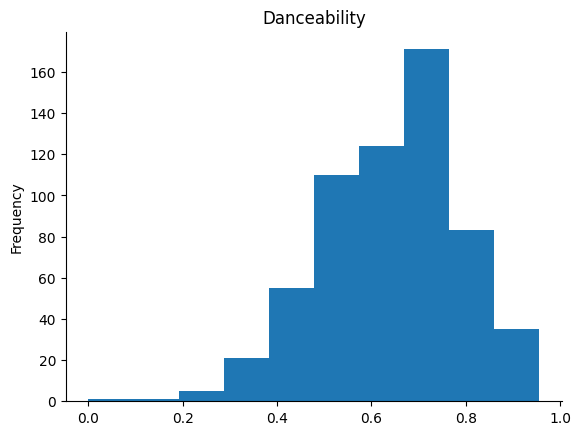

In [ ]:
dance_merged_df['danceability'].plot(kind='hist', bins=10, title='Danceability')
plt.gca().spines[['top', 'right',]].set_visible(False)

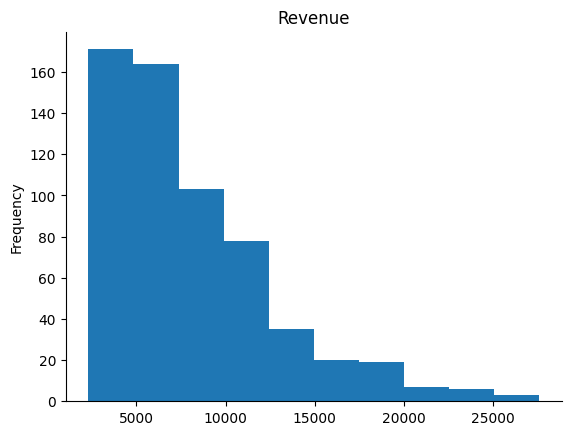

In [ ]:
dance_merged_df['indicativerevenue'].plot(kind='hist', bins=10, title='Revenue')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
first_quartile_dance_df = dance_merged_df[dance_merged_df['Quartile'] == 'Q1']
first_revenue_dance_df = first_quartile_dance_df['indicativerevenue'].mean()

sec_quartile_dance_df = dance_merged_df[dance_merged_df['Quartile'] == 'Q2']
sec_revenue_dance_df = sec_quartile_dance_df['indicativerevenue'].mean()

third_quartile_dance_df = dance_merged_df[dance_merged_df['Quartile'] == 'Q3']
third_revenue_dance_df = third_quartile_dance_df['indicativerevenue'].mean()

fourth_quartile_dance_df = dance_merged_df[dance_merged_df['Quartile'] == 'Q4']
fourth_revenue_dance_df = fourth_quartile_dance_df['indicativerevenue'].mean()

print('Quartile 1',first_revenue_dance_df)
print('Quartile 2',sec_revenue_dance_df)
print('Quartile 3',third_revenue_dance_df)
print('Quartile 4',fourth_revenue_dance_df)


Quartile 1 13866.172312500003
Quartile 2 8319.642636363635
Quartile 3 5574.174294871796
Quartile 4 4140.178666666667


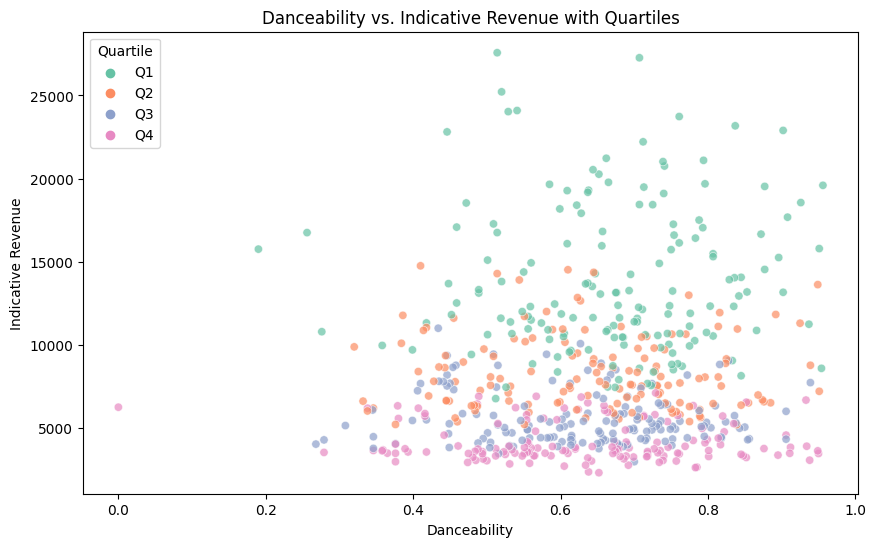

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability', y='indicativerevenue', data=dance_merged_df, hue='Quartile', palette='Set2', alpha=0.7)
plt.xlabel('Danceability')
plt.ylabel('Indicative Revenue')
plt.title('Danceability vs. Indicative Revenue with Quartiles')
plt.legend(title='Quartile')
plt.show()

# **Hypothesis 3: Sentiment Analysis of Top Songs from every Decade**

In [ ]:
spotify_charts_yearly

,year,position,artist,song,indicativerevenue,us,uk,de,fr,ca,au
0,2000,1,Faith Hill,Breathe,24030.051,2,33,-,-,-,23
1,2000,2,Santana & The Product G,Maria Maria,23320.084,1,6,1,1,1,49
2,2000,3,Joe Thomas,I Wanna Know,21516.777,4,-,-,61,-,34
3,2000,4,Aaliyah,Try Again,21099.824,1,5,5,26,-,8
4,2000,5,Toni Braxton,He Wasn't Man Enough,21023.066,2,5,20,14,-,5
...,...,...,...,...,...,...,...,...,...,...,...
2395,2023,96,Steve Lacy,Bad Habit,3139.038,9,51,-,-,-,13
2396,2023,97,Oliver Tree & Robin Schulz,Miss You,3135.564,95,7,21,23,34,5
2397,2023,98,"Tyler, The Creator & Kali Uchis",See You Again,3121.135,44,21,-,-,30,28
2398,2023,99,Lainey Wilson,Watermelon Moonshine,3047.852,21,-,-,-,47,-


In [ ]:
top_songs_by_year_dct = spotify_charts_yearly.groupby('year').apply(lambda group: group[['position', 'artist', 'song', 'indicativerevenue']].to_dict(orient='records')).to_dict()

for key,value in top_songs_by_year_dct.items():
  print(key)
  print(value)
  print('---')

decades_song_df = pd.DataFrame(top_songs_by_year_dct)

2000
[{'position': 1, 'artist': 'Faith Hill', 'song': 'Breathe', 'indicativerevenue': 24030.051}, {'position': 2, 'artist': 'Santana & The Product G', 'song': 'Maria Maria', 'indicativerevenue': 23320.084}, {'position': 3, 'artist': 'Joe Thomas', 'song': 'I Wanna Know', 'indicativerevenue': 21516.777}, {'position': 4, 'artist': 'Aaliyah', 'song': 'Try Again', 'indicativerevenue': 21099.824}, {'position': 5, 'artist': 'Toni Braxton', 'song': "He Wasn't Man Enough", 'indicativerevenue': 21023.066}, {'position': 6, 'artist': 'Rob Thomas & Santana', 'song': 'Smooth', 'indicativerevenue': 20735.418}, {'position': 7, 'artist': 'Vertical Horizon', 'song': 'Everything You Want', 'indicativerevenue': 20402.965}, {'position': 8, 'artist': "Destiny's Child", 'song': 'Say My Name', 'indicativerevenue': 19489.657}, {'position': 9, 'artist': 'Lonestar', 'song': 'Amazed', 'indicativerevenue': 19138.169}, {'position': 10, 'artist': 'Matchbox Twenty', 'song': 'Bent', 'indicativerevenue': 18997.978}, {'

In [ ]:
song_list = []
for key, sub_dct in top_songs_by_year_dct.items():
    #print(sub_dct)

    for column in sub_dct:
        #print(column)

        if column['position'] == 1:
          song_list.append(column['song'])
          #print(column['song'])

print(song_list)

['Breathe', 'Hanging By A Moment', 'I Need A Girl', 'In Da Club', 'Yeah!', 'We Belong Together', "Hips Don't Lie", 'Umbrella', 'Bleeding Love', 'Poker Face', 'Tik-Toc', 'Rolling In The Deep', 'Somebody That I Used To Know', 'Blurred Lines', 'Happy', 'Uptown Funk', 'Cheap Thrills', 'Shape Of You', 'Perfect', 'Old Town Road', 'Blinding Lights', 'Save Your Tears', 'As It Was', 'Flowers']


# **Top Songs Across Decades**

From using pandas and extracting the top songs from each year from 2000-2023, we are able to get a list of the top ranked songs from across 2+ decades. As music tastes of consumers likely change overtime, we can use sentiment analysis to analyze whether the top ranking songs tend to skew more "positive" or "negative" overtime, suggesting whether consumers prefer happier songs.

**Top Songs Ranked #1 Across 2000-2023**

Year 2000: Breathe

Year 2001: Hanging By A Moment

Year 2002: I Need A Girl

Year 2003: In Da Club

Year 2004: Yeah

Year 2005: We Belong Together

Year 2006: Hips Don't Lie

Year 2007: Umbrella

Year 2008: Bleeding Love

Year 2009: Poker Face

Year 2010: Tik-Toc

Year 2011: Rolling In The Deep

Year 2012: Somebody That I Used To Know

Year 2013: Blurred Lines

Year 2014: Happy

Year 2015: Uptown Funk

Year 2016: Cheap Thrills

Year 2017: Shape Of You

Year 2018: Perfect

Year 2019: Old Town Road

Year 2020: Blinding Lights

Year 2021: Save Your Tears

Year 2022: As It Was

Year 2023: Flowers


# **Visualization of Song Attributes, Revenues, and Rankings!**

Text(0.5, 1.0, 'Position of Yearly Song Ranking vs. Associated Indicative Revenue')

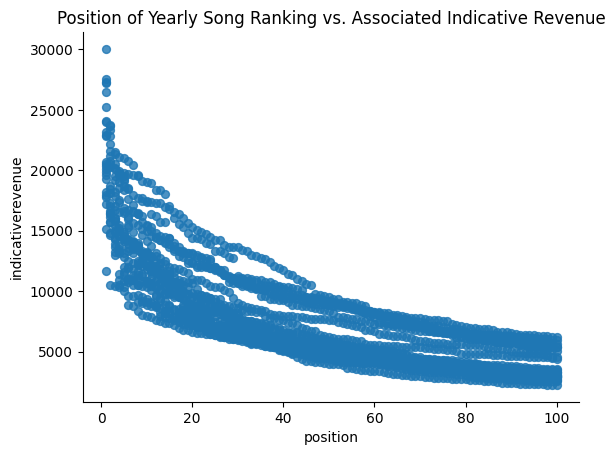

In [ ]:
spotify_charts_yearly.plot(kind='scatter', x='position', y='indicativerevenue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.title('Position of Yearly Song Ranking vs. Associated Indicative Revenue')

This graph above shows position of a certain song relative to its indicative revenue.

**Takeaway: Higher ranked positions have higher indicative revenue on average!**

In [ ]:
spotify_charts_yearly

,year,position,artist,song,indicativerevenue,us,uk,de,fr,ca,au
0,2000,1,Faith Hill,Breathe,24030.051,2,33,-,-,-,23
1,2000,2,Santana & The Product G,Maria Maria,23320.084,1,6,1,1,1,49
2,2000,3,Joe Thomas,I Wanna Know,21516.777,4,-,-,61,-,34
3,2000,4,Aaliyah,Try Again,21099.824,1,5,5,26,-,8
4,2000,5,Toni Braxton,He Wasn't Man Enough,21023.066,2,5,20,14,-,5
...,...,...,...,...,...,...,...,...,...,...,...
2395,2023,96,Steve Lacy,Bad Habit,3139.038,9,51,-,-,-,13
2396,2023,97,Oliver Tree & Robin Schulz,Miss You,3135.564,95,7,21,23,34,5
2397,2023,98,"Tyler, The Creator & Kali Uchis",See You Again,3121.135,44,21,-,-,30,28
2398,2023,99,Lainey Wilson,Watermelon Moonshine,3047.852,21,-,-,-,47,-


# **Visualization: Revenues across 2000-2023**

Points in green are above average revenue across all the years! We can visualize the trend in revenue performance across 20+ years!

Takeaway: Most songs on top 100 charts each year will outperform average revenue, and highest peak of revenue was in 2004!

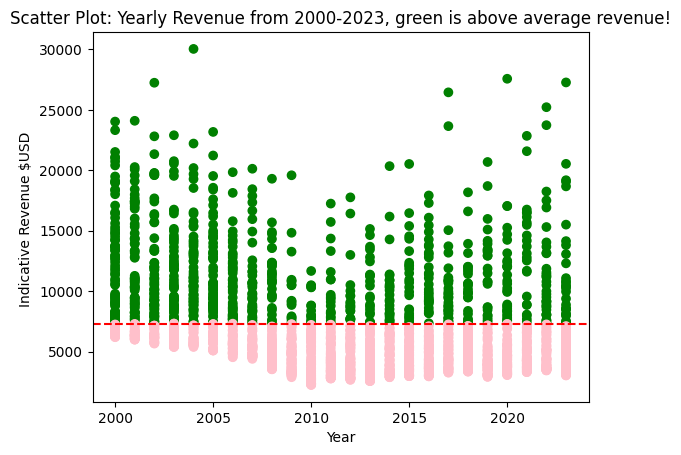

In [ ]:
year_list = spotify_charts_yearly['year'].tolist()
revenue_list = spotify_charts_yearly['indicativerevenue'].tolist()
average_revenue = statistics.mean(revenue_list)

threshold_revenue = average_revenue  # Adjust this value as needed

# Create a list of colors based on revenue values
colors = ['green' if revenue > threshold_revenue else 'pink' for revenue in revenue_list]

plt.scatter(year_list, revenue_list, c=colors)
plt.axhline(y=threshold_revenue, color='red', linestyle='--', label='Threshold Revenue')
plt.xlabel('Year')
plt.ylabel('Indicative Revenue $USD ')
plt.title('Scatter Plot: Yearly Revenue from 2000-2023, green is above average revenue!')

plt.show()


# **Sentiment Analysis:**

# *Hypothesis 3: *

3) We will implement sentiment analysis models to analyze the correlated sentiment scores on top ranked songs across various decades.

We hypothesize that there will be little correlation between sentiment scores and song ranking because the top charts tend to feature both "sad" and "happy" songs in the music industry. Sentiment analysis is not a perfect system as well, and we will visualize and compute metrics to analyze this hypothesis.

In [ ]:
spotify_charts2000_lyrics = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/chart2000-song-lyrics.csv")

spotify_charts2000_lyrics.dropna()

,decade,position,artist,song,lyrics
0,2020s,1.0,The Weeknd,Blinding Lights,"Yean, I've been tryna call. I've been on my ow..."
1,2020s,2.0,Glass Animals,Heat Waves,"Road shimmer wigglin' the vision, Heat, heat w..."
2,2020s,3.0,Harry Styles,As It Was,"Holdin' me back, Gravity's holdin' me back. I ..."
3,2020s,4.0,The Kid LAROI & Justin Bieber,Stay,I do the same thing I told you that I never wo...
4,2020s,5.0,The Weeknd & Ariana Grande,Save Your Tears,"I saw you dancing in a crowded room (Uh), You ..."
5,2020s,6.0,Ed Sheeran,Bad Habits,"One, two, three four, Ooh-ooh, ooh-ooh-ooh. Ev..."
6,2020s,7.0,Dua Lipa & DaBaby,Levitating,"If you wanna run away with me, I know a galaxy..."
7,2020s,8.0,Ed Sheeran,Shivers,"I took an arrow to the heart, I never kissed a..."
8,2020s,9.0,Miley Cyrus,Flowers,"We were good, we were gold, Kinda dream that c..."
9,2020s,10.0,Elton John & Dua Lipa,Cold Heart,"It's a human sign, When things go wrong, When ..."


In [ ]:
columns = spotify_charts2000_lyrics.columns

In [ ]:
def sentiment_score(lyrics):
    lyrics = str(lyrics)
    return TextBlob(lyrics).sentiment.polarity

spotify_charts2000_lyrics["Sentiment"] = spotify_charts2000_lyrics["lyrics"].apply(sentiment_score)

print(spotify_charts2000_lyrics[["position", "Sentiment"]])

    position  Sentiment
0        1.0   0.081250
1        2.0  -0.150000
2        3.0   0.000000
3        4.0   0.053061
4        5.0   0.115714
5        6.0  -0.164683
6        7.0   0.406250
7        8.0   0.280159
8        9.0   0.506593
9       10.0  -0.118519
10       NaN   0.000000
11       NaN   0.000000
12     191.0   0.428146
13     192.0   0.014198
14     193.0   0.440000
15     194.0  -0.053016
16     195.0   0.196667
17     196.0   0.036111
18     197.0  -0.063549
19     198.0  -0.342803
20     199.0  -0.119048
21     200.0   0.091427


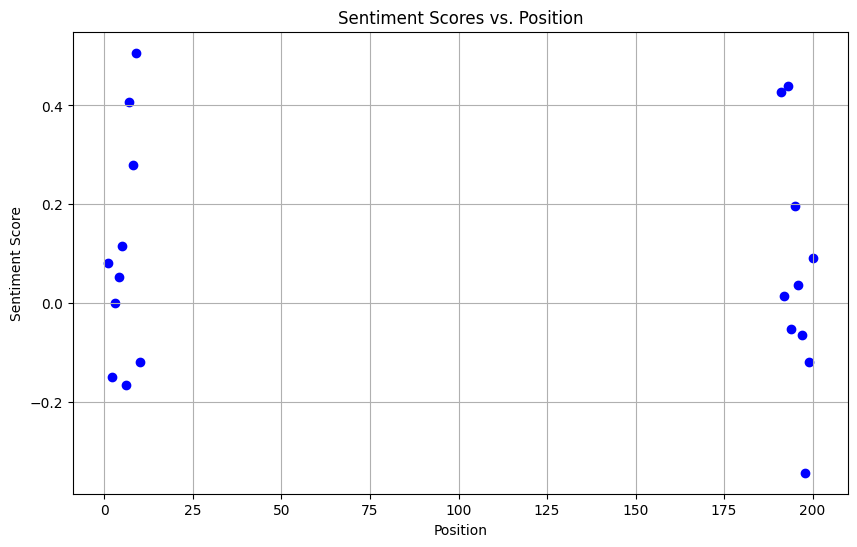

In [ ]:
sentiment_score_2020 = spotify_charts2000_lyrics['Sentiment'].tolist()
song_position = spotify_charts2000_lyrics['position'].tolist()

plt.figure(figsize=(10, 6))
plt.scatter(song_position, sentiment_score_2020, color='blue', marker='o')
plt.title('Sentiment Scores vs. Position')
plt.xlabel('Position')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()

In [ ]:
merged_df = pd.merge(spotify_charts2000_lyrics, spotify_charts2000, on=['artist', 'song']) #For the 2020 rankings present in the large dataset

# Print or further process the merged DataFrame as needed
merged_df

,decade_x,position_x,artist,song,lyrics,Sentiment,decade_y,position_y,indicativerevenue,us,uk,de,fr,ca,au
0,2020s,1.0,The Weeknd,Blinding Lights,"Yean, I've been tryna call. I've been on my ow...",0.081250,2020s,1,48670.111613,1,1,1,1,1,1
1,2020s,2.0,Glass Animals,Heat Waves,"Road shimmer wigglin' the vision, Heat, heat w...",-0.150000,2020s,2,43517.037733,1,5,2,14,1,1
2,2020s,3.0,Harry Styles,As It Was,"Holdin' me back, Gravity's holdin' me back. I ...",0.000000,2020s,3,39017.858955,1,1,1,1,1,1
3,2020s,4.0,The Kid LAROI & Justin Bieber,Stay,I do the same thing I told you that I never wo...,0.053061,2020s,4,34620.612774,1,2,1,3,1,1
4,2020s,5.0,The Weeknd & Ariana Grande,Save Your Tears,"I saw you dancing in a crowded room (Uh), You ...",0.115714,2020s,5,34387.682465,1,2,5,6,1,3
5,2020s,6.0,Ed Sheeran,Bad Habits,"One, two, three four, Ooh-ooh, ooh-ooh-ooh. Ev...",-0.164683,2020s,6,33060.219123,2,1,1,4,1,1
6,2020s,7.0,Dua Lipa & DaBaby,Levitating,"If you wanna run away with me, I know a galaxy...",0.406250,2020s,7,31441.942216,2,5,16,24,1,4
7,2020s,8.0,Ed Sheeran,Shivers,"I took an arrow to the heart, I never kissed a...",0.280159,2020s,8,28055.847839,4,1,1,10,2,2
8,2020s,9.0,Miley Cyrus,Flowers,"We were good, we were gold, Kinda dream that c...",0.506593,2020s,9,27270.016735,1,1,1,1,1,1
9,2020s,10.0,Elton John & Dua Lipa,Cold Heart,"It's a human sign, When things go wrong, When ...",-0.118519,2020s,10,26444.898284,7,1,3,9,1,1


# **MUSIC VISUALIZATION (Across the Datasets & Years)**

---



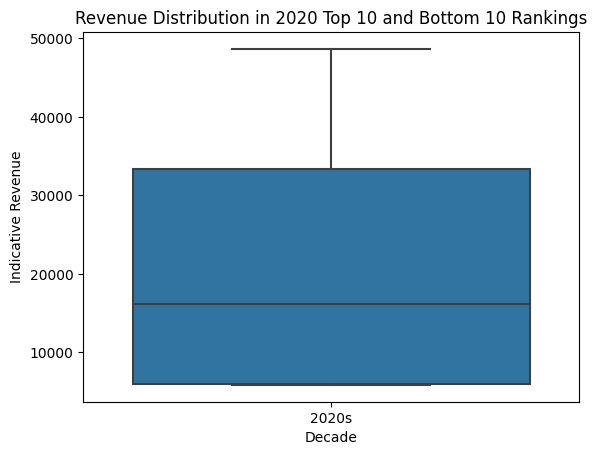

In [ ]:
import seaborn as sns
sns.boxplot(x='decade_x', y='indicativerevenue', data=merged_df)
plt.xlabel('Decade')
plt.ylabel('Indicative Revenue')
plt.title('Revenue Distribution in 2020 Top 10 and Bottom 10 Rankings')
plt.show()

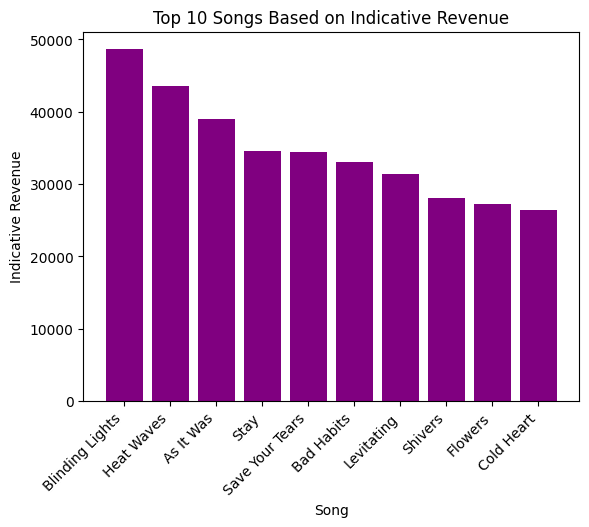

In [ ]:
top_songs = merged_df.nlargest(10, 'indicativerevenue')
plt.bar(top_songs['song'], top_songs['indicativerevenue'],color='purple')
plt.xlabel('Song')
plt.ylabel('Indicative Revenue')
plt.title('Top 10 Songs Based on Indicative Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()

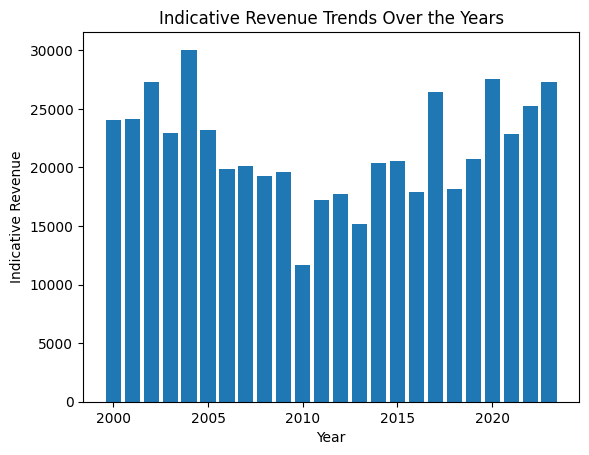

In [ ]:
plt.bar(spotify_charts_yearly['year'], spotify_charts_yearly['indicativerevenue'])
plt.xlabel('Year')
plt.ylabel('Indicative Revenue')
plt.title('Indicative Revenue Trends Over the Years')
plt.show()

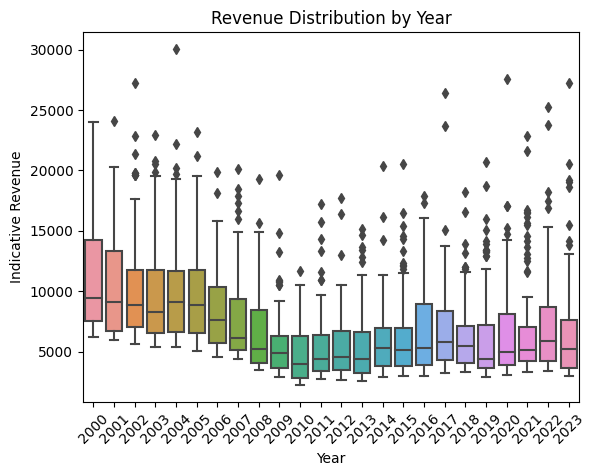

In [ ]:

sns.boxplot(x='year', y='indicativerevenue', data=spotify_charts_yearly)
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Indicative Revenue')
plt.title('Revenue Distribution by Year')
plt.show()

## **Music & Industry Simulations!**

**What if we were able to simulate the associated revenue based on danceability scores?**

Let's use a Monte Carlo Algorithm to do that.

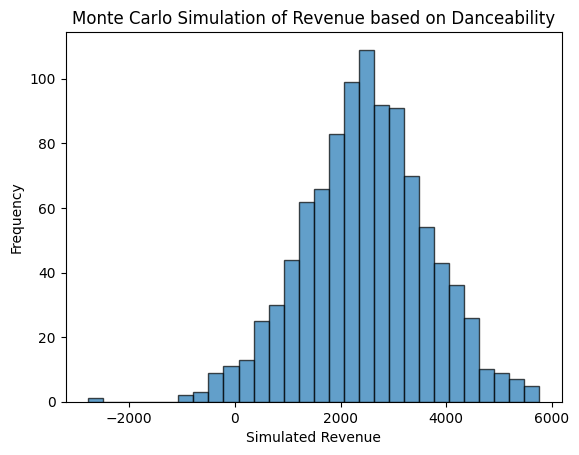

In [ ]:
# based on danceability, we set parameters
avg_danceability = spotify_data['danceability'].mean()
dev_danceability = spotify_data['danceability'].std()

# Simulation #
num_simulations = 1000

# Monte Carlo simulation based on danceability
simulated_dance = np.random.normal(avg_danceability, dev_danceability, num_simulations)

# We want to build off previous danceability vs. revenue tests earlier in projects
simulated_revenues = simulated_dance * 4000 + np.random.normal(0, 1000, num_simulations)

# Next, we plot the simulated revenue distribution
plt.hist(simulated_revenues, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Simulated Revenue')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation of Revenue based on Danceability')
plt.show()

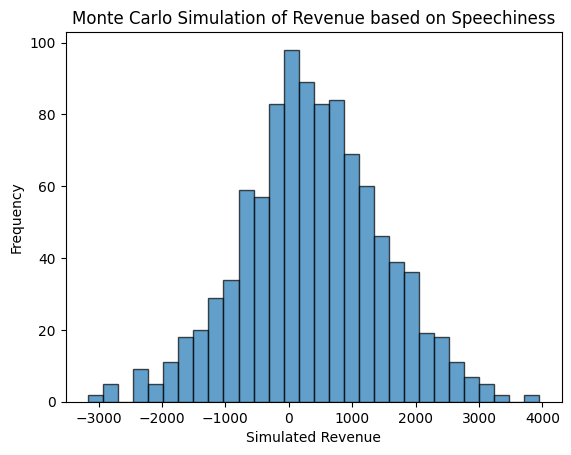

In [ ]:
# based on speechiness, we set parameters
avg_speech = spotify_data['speechiness'].mean()
dev_speech = spotify_data['speechiness'].std()

# Simulation #
num_simulations = 1000

# Monte Carlo simulation based on speechiness
simulated_speech = np.random.normal(avg_speech, dev_speech, num_simulations)

simulated_speech = simulated_speech * 4000 + np.random.normal(0, 1000, num_simulations)

# Next, we plot the simulated revenue distribution
plt.hist(simulated_speech, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Simulated Revenue')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation of Revenue based on Speechiness')
plt.show()

# **Monte Carlo Algorithms**

As our project explored the correlation and finding significance of certains song attributes, we wanted to use our Monte Carlo Learning to simulate what forecasted revenue would look like based on a certain song attribute.

In this case, we simulated what revenue would potentially look like based on 1) danceability or 2) speechiness.

# **Project Takeaways**

1) Certain positive song attributes can correlate to higher song rankings & revenue performance across decades!

	Industry Takeaway: Artists can use this data to forecast earnings, listeners, and rankings


2) The music industry is changing everyday with new genres, styles, and consumer habits

	Industry Takeaway: Emerging artists can compare their originals to the industry but should remember that data doesn’t tell the whole story!

3) Higher danceability & energy songs tend to perform better (based on this data), likely reflecting how humans look to music for an uplifting atmosphere

4) Industry experts likely also use data science to forecast industry trends!


# **Disclaimers**


Since our data is publicly available based on published Spotify records and billboard rankings, there seems to not be any significant privacy concerns. However, as data scientists always consider the ethics behind their analyses, a potential concern is that the song attributes in the dataset are based only on Spotify’s calculations of energy, danceability, valence, etc. Given that music taste is subjective, the song attribute metrics may vary depending on the firm or methods used to calculate them for each song.

  Other potential biases of our datasets include sampling bias. Although our song dataset includes over 20,000 songs, these songs were released only in the past 23 years, reflecting a “younger” generations music taste compared to before the 2000’s consumer behavior. We also did not include any songs in other languages, as our sentiment analysis library we used only interprets English. Another potential bias in our dataset is selection bias, which is where the songs we are observing may not represent the overall characteristics of all songs, as our dataset does not contain all the music genres globally. Finally, another potential bias is measurement bias, as our first dataset (Song_dataset.csv) only used 12 different factors to judge songs. There are endless factors in music that can be taken in to analyze what makes a song successful, as well as external factors including brand representation, presence of an agent, pre-existing fame, and more.



# **Future Plans**

The results of our project led us to be able to observe real reported music industry data, merge various datasets, and use multiple data science techniques to learn more about one of our shared passions. From calculating Spotify industry song attributes and revenues, we realized that artists have an increasing amount of competition across various styles and genres of music. As many established artists likely have an associated marketing and branding team to leverage the ongoing trends in the industry, we learned that emerging artists may not have the same access to experts that can forecast the next trends, associated revenues, and what their “song attributes” should be to maximize revenue and ranking.

Future Work:

For future plans, we can gather even more song datasets to make our analyses as accurate as possible from increasing the amount of songs evaluated, featuring more genres, and comparing music pre-2000’s. We could also look into Apple Music’s reported data analytics compared to Spotify’s trends and rankings for a more holistic analysis. As the music industry and consumer listening behavior and preferences are changing everyday, there are unlimited possibilities connecting data science and the music industry.
